In [221]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy as gp
from geopy import distance
import math
import matplotlib as mpl

In [227]:
def do_star_graph_series(series,node_color='pink',font_color='black',mode='node',title=''):
    labs = ['']+list(series.index)
    labs = dict(zip(labs,labs))
    g = nx.DiGraph()
    i = 1
    g.add_star(['']+list(series.index))

    pos = nx.layout.spring_layout(g)
    if 0 in series:
        print("hi")
    if mode=='both':
        
        node_sizes = [100]+list(series.values.ravel())
        edge_colors =list(map(math.log,series.values.ravel()))    
        nodes = nx.draw_networkx_nodes(g,pos,node_size=node_sizes,node_color=node_color)
        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2,edge_cmap = plt.cm.winter,edge_color=edge_colors)
        pc = mpl.collections.PatchCollection(edges,cmap=plt.cm.winter)
        pc.set_array(edge_colors)
        plt.colorbar(pc)

    # edge_colors=range(2,g.number_of_edges()+2 )
    elif mode=='edge':
        edge_colors =list(map(math.log,series.values.ravel()))
        nodes = nx.draw_networkx_nodes(g,pos,node_color=node_color)
        node_sizes = [100]+list(series.values.ravel())

        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2,edge_cmap = plt.cm.winter,edge_color=edge_colors)
        pc = mpl.collections.PatchCollection(edges,cmap=plt.cm.winter)
        pc.set_array(edge_colors)
        plt.colorbar(pc)
    elif mode=='node':
        node_sizes = [100]+list(series.values.ravel())
        nodes = nx.draw_networkx_nodes(g,pos,node_size=node_sizes,node_color=node_color)
        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2)

    labels = nx.draw_networkx_labels(g,pos,labels=labs,font_color=font_color)



    ax = plt.gca()
    ax.set_axis_off()
    fig = plt.gcf()
    fig.set_size_inches(14,10)
    plt.title(title)
    plt.show()

In [177]:
data = pd.read_csv('openfoodfacts.csv',delimiter='\t',low_memory = False)
distance_df = pd.read_csv('data/DistancePerProduct.csv')

In [178]:
# data['code'] = data['code'].apply(lambda x : x.strip('0'))
# data.set_index('code',inplace=True)
distance_df.set_index('Unnamed: 0',inplace=True)
distance_df.index.name = ''



In [179]:
z = data.join(distance_df).dropna(subset=['distance'])

In [187]:
z.head()

,manufacturing_places_tags,countries_en
106,france,France
251,france,France
254,brossard-quebec,Canada
264,brossard-quebec,Canada
269,united-kingdom,United Kingdom


In [188]:
## Explode the categroies...
explode = z['categories'].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
explode = explode.reset_index().set_index('level_1')
explode = explode.drop(['level_0'],axis=1)
explode.index.name=''
explode.head()

,0
,
106,Compléments alimentaires
251,Plats préparés
254,Légumes-feuilles
264,Snacks sucrés
269,Plant-based foods and beverages


In [189]:
merged = explode.join(z)
merged

,0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,distance
106,Compléments alimentaires,0000000020114,http://world-en.openfoodfacts.org/product/0000...,chris13,1502444009,2017-08-11T09:33:29Z,1524490564,2018-04-23T13:36:04Z,Naturablue original,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Plats préparés,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Meat-based products,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Plats à base de viande,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Plats préparés à réchauffer au micro-ondes,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Plats à base de volaille,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
251,Plats à base de dinde,0000000274722,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1514659309,2017-12-30T18:41:49Z,1535310176,2018-08-26T19:02:56Z,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0 km
254,Légumes-feuilles,0000000290616,http://world-en.openfoodfacts.org/product/0000...,b7,1484605978,2017-01-16T22:32:58Z,1484606542,2017-01-16T22:42:22Z,Salade Cesar,Laitue en salade,...,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
264,Snacks sucrés,0000000394710,http://world-en.openfoodfacts.org/product/0000...,b7,1484497370,2017-01-15T16:22:50Z,1484501040,2017-01-15T17:24:00Z,Danoises à la cannelle roulées,Pâtisserie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km
264,Biscuits et gâteaux,0000000394710,http://world-en.openfoodfacts.org/product/0000...,b7,1484497370,2017-01-15T16:22:50Z,1484501040,2017-01-15T17:24:00Z,Danoises à la cannelle roulées,Pâtisserie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2370.413699903153 km


In [190]:
largest = explode[explode[0].apply(lambda x : not x.startswith('en:'))][0].value_counts().nlargest(10)

Aliments et boissons à base de végétaux


C:\Users\johan\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-------------


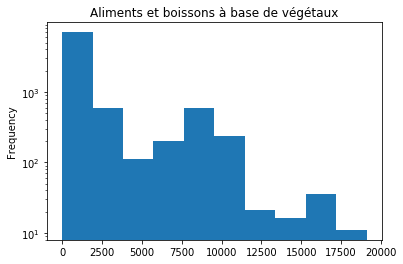

Aliments d'origine végétale
-------------


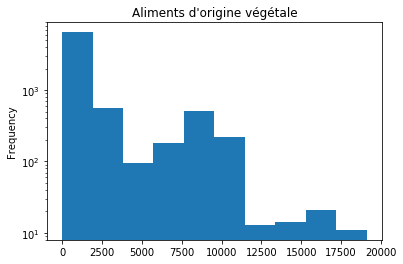

Snacks sucrés
-------------


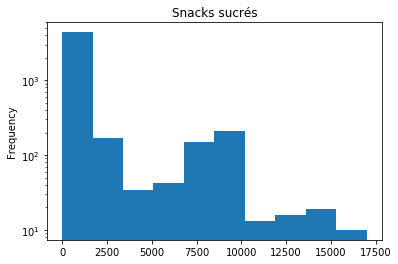

Produits laitiers
-------------


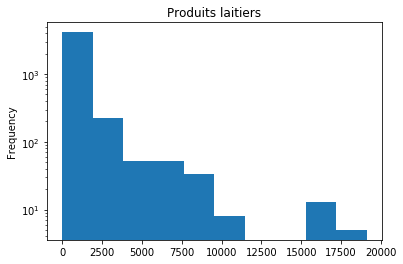

Boissons
-------------


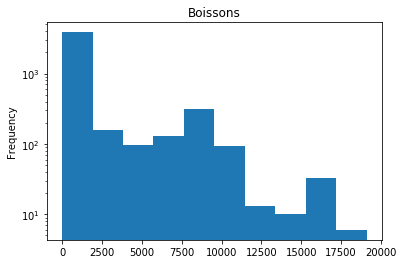

Plats préparés
-------------


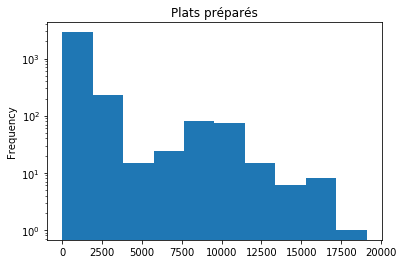

Viandes
-------------


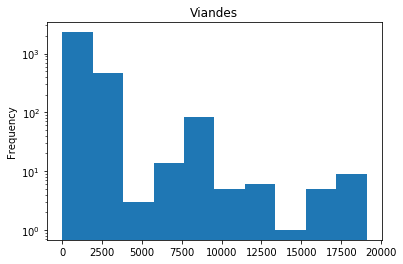

Aliments à base de fruits et de légumes
-------------


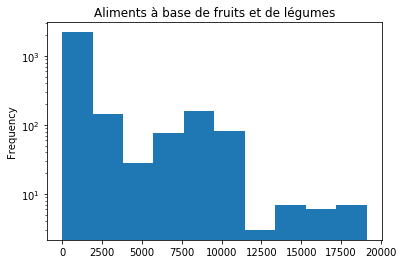

Céréales et pommes de terre
-------------


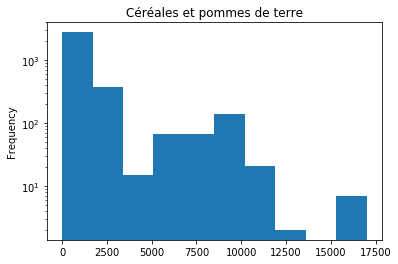

Desserts
-------------


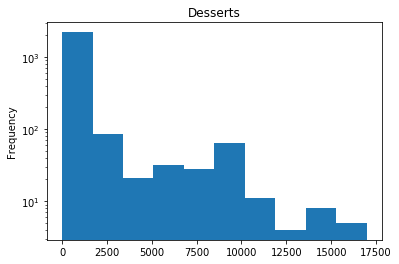

In [191]:
for category in list(largest.index):
    cat = merged[merged[0]==category]
    print(category)
    cat['distance'] = cat['distance'].apply(lambda x : float(x[:-2]))
    cat['distance'].plot.hist(bins=10,title=category,logy=True)
    print("-------------")
    plt.show()

C:\Users\johan\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Aliments et boissons à base de végétaux


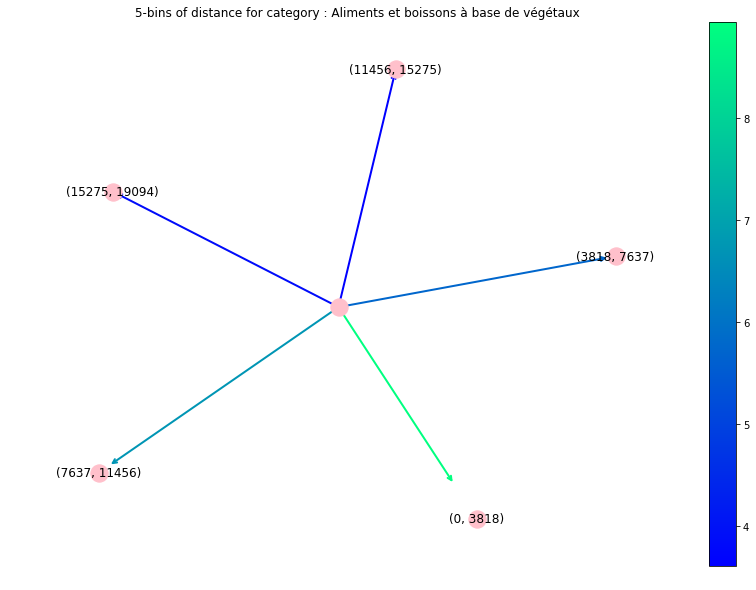

Aliments d'origine végétale


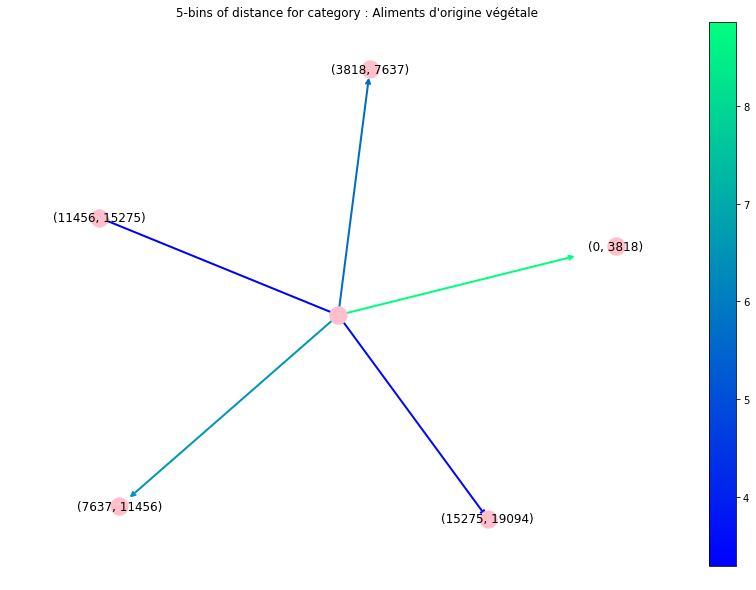

Snacks sucrés


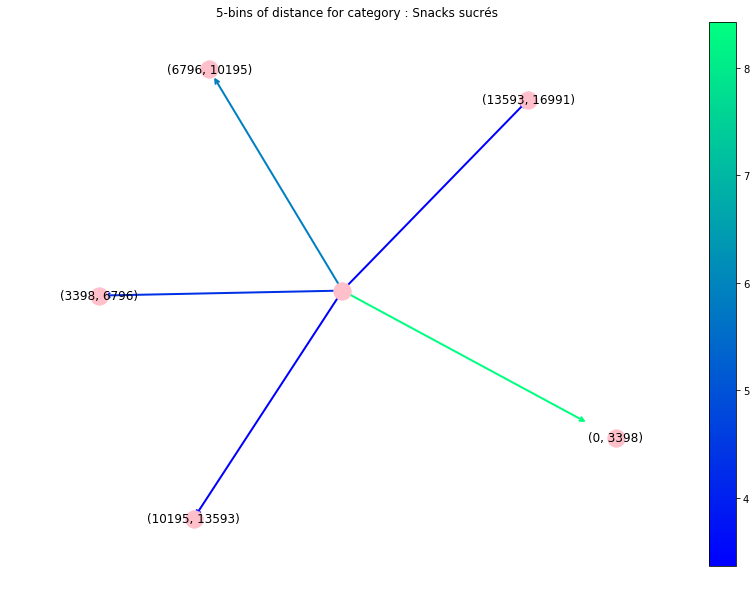

Produits laitiers


ValueError: math domain error

In [228]:
for category in largest.index:
    cat = merged[merged[0]==category]
    cat['distance'] = cat['distance'].apply(lambda x : float(x[:-2]))
    print(category)
    count, division = np.histogram((cat['distance']),bins=5)
    ziped = list(zip(division.astype(int),division[1:].astype(int)))



    series = pd.Series(count)
    series.index = ziped
    do_star_graph_series(series,mode='edge',title="5-bins of distance for category : "+category)
    plt.show()

ValueError: math domain error